In [1]:
import spacy
#if you need to install spacy you can 
#uncomment the pip install or see the link below
#https://spacy.io/usage/
#!pip install -U spacy
from spacy import displacy
nlp = spacy.load('en')
doc = nlp(u'''
The history of natural language processing generally started in the 1950s, although work can be found from earlier periods. 
In 1950, Alan Turing published an article titled "Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. 
The authors claimed that within three or five years, machine translation would be a solved problem.
However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. 
Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.
''')
doc.user_data['title'] = 'An Introduction to Text Mining'
displacy.render(doc, style = 'ent', jupyter = True)

In [2]:
doc.user_data['title'] = 'An Introduction to Text Mining'
displacy.render(doc, style = 'ent', jupyter = True)

In [3]:
import pandas as pd

In [4]:
#load the data
songs = pd.read_json('big_one.json')

In [5]:
#take a peek at the first five rows
songs.head()

,album,artists,text
0,[Not for Sale],[Smoke DZA],"[Harlem rapper Smoke DZA keeps it real on , , ..."
1,[Loud Patterns],[Makeness],[The first full-length album from the British ...
2,"[am i happy, singing_]",[Ricky Eat Acid],[On this three-track album from Sam Ray’s elec...
3,[Ceremony of Dreams: Studio Sessions & Outtake...,[Entourage],[The unearthing of these odd compositions from...
4,"[My Dear Melancholy,]",[The Weeknd],[The Weeknd’s new six-song album finds him in ...


In [6]:
#clean up the data in 
#anticipation of NLP
for i in songs.columns:
    songs[i] = songs[i].apply(lambda x: ''.join(x))

In [7]:
songs.head()

,album,artists,text
0,Not for Sale,Smoke DZA,"Harlem rapper Smoke DZA keeps it real on , dou..."
1,Loud Patterns,Makeness,The first full-length album from the British s...
2,"am i happy, singing_",Ricky Eat Acid,On this three-track album from Sam Ray’s elect...
3,Ceremony of Dreams: Studio Sessions & Outtakes...,Entourage,The unearthing of these odd compositions from ...
4,"My Dear Melancholy,",The Weeknd,The Weeknd’s new six-song album finds him in l...


In [8]:
#look at first review
songs['text'][0][:1000]

'Harlem rapper Smoke DZA keeps it real on , doubling down on classic hip-hop as he’s got an allergy to trends. That’s mostly a good thing.Harlem rapper ’s  is a memorandum for culture vultures, those outsiders who, in his mind, are trying to pollute rap, and those industry insiders trying to sap its swagger for their own personal gain. DZA is a classicist, and he derides those in the game selling out, all while listing off the things money can’t buy them—the love, smoothness, the culture, the cool. If 2016’s  with Bronx legend and rap super-producer  was DZA’s taking a stand in deed, aligning himself with a cultural icon, then this is him writing new bylaws. These are DZA’s 12 rap commandments, in which he extols the mid-grade hustler.DZA’s rap philosophy is to always err on the side of caution. This can make him a bit of a conservative music-maker, but it also makes him relatively dependable. He presents a lifestyle of subtle comfort and his verses are capo proverbs rapped through kus

In [9]:
from nltk import word_tokenize

In [10]:
tokes = word_tokenize(songs['text'][0])

In [11]:
tokes[:10]

['Harlem',
 'rapper',
 'Smoke',
 'DZA',
 'keeps',
 'it',
 'real',
 'on',
 ',',
 'doubling']

In [12]:
#getting frequencies
import nltk

In [13]:
fdist = nltk.FreqDist(tokes)

In [14]:
fdist.most_common(10)

[(',', 61),
 ('’', 38),
 ('the', 25),
 ('.', 24),
 ('s', 22),
 ('a', 18),
 ('his', 18),
 ('to', 17),
 ('and', 16),
 ('of', 16)]

In [15]:
fdist.plot(20)

<Figure size 640x480 with 1 Axes>

### Stopword Removal

In [16]:
from nltk.corpus import stopwords

In [17]:
set(stopwords.words('english')[:20])

{'he',
 'him',
 'his',
 'i',
 'me',
 'my',
 'myself',
 'our',
 'ours',
 'ourselves',
 'we',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [18]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
filtered_review = [w for w in tokes if not w in stopwords]
print('The original review {}\nand the filtered {}'.format(len(tokes), len(filtered_review)))

The original review 887
and the filtered 561


In [19]:
filtered_review[:10]

['Harlem',
 'rapper',
 'Smoke',
 'DZA',
 'keeps',
 'real',
 ',',
 'doubling',
 'classic',
 'hip-hop']

### Regular Expression filtering

In [20]:
import re
review_words = re.split(r'\W+', songs['text'][0])

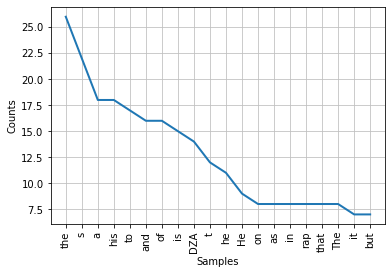

In [21]:
fdist = nltk.FreqDist(review_words)
fdist.plot(20)

In [22]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
filtered_review = [w for w in review_words if not w in stopwords]
print('The original review {}\nand the filtered {}'.format(len(tokes), len(filtered_review)))                

The original review 887
and the filtered 420


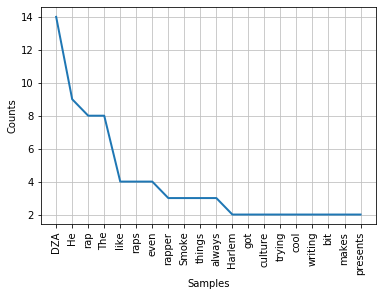

In [23]:
fdist = nltk.FreqDist(filtered_review)
fdist.plot(20)

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [25]:
x = np.arange(len(list(fdist.keys())))
y = list(fdist.values())
labels = list(fdist.keys())

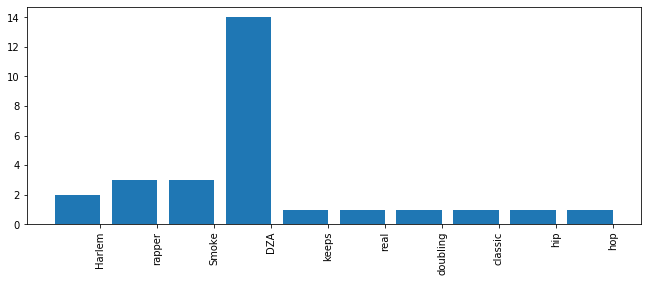

In [26]:
plt.figure(figsize = (11,4))
plt.bar(x[:10], y[:10])
plt.xticks(x[:10]+ 0.4, labels[:10], rotation = 90);

### Most Common Words

In [27]:
fdist.most_common(10)

[('DZA', 14),
 ('He', 9),
 ('rap', 8),
 ('The', 8),
 ('like', 4),
 ('raps', 4),
 ('even', 4),
 ('rapper', 3),
 ('Smoke', 3),
 ('things', 3)]

In [28]:
x = np.arange(10)
y = [i[1] for i in fdist.most_common(10)]
labels = [i[0] for i in fdist.most_common(10)]

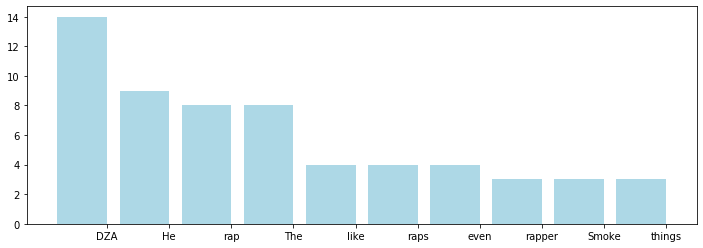

In [29]:
plt.figure(figsize = (12,4))
plt.bar(x[:10], y[:10], color = 'lightblue')
plt.xticks(x[:10]+ 0.4, labels[:10]);

## Sentiment Analysis

from Wikipedia page on [List of music considered the worst](https://en.wikipedia.org/wiki/List_of_music_considered_the_worst)
> *"Sgt. Pepper's Lonely Hearts Club Band, The Beatles (1967) 
Voted the worst record ever made in a 1998 Melody Maker poll of pop stars, DJs, and journalists.[3] Among the harshest detractors was musician and journalist John Robb, who described the album as "the benchmark of 1967 - the low water point of rock 'n' roll".[3] Guardian critic Richard Smith wrote that it is, "if not the worst, then certainly the most overrated album of all time." He also contended that the "excruciating" LP was often ranked by members of the music press as the best ever due to affection for its cultural impact, and "not because of anything intrinsically great about the record".[4] Billy Childish was asked in 2007 to nominate the "supposedly great" album that he would "gladly never hear again", and he named Sgt. Pepper's Lonely Hearts Club Band and argued that it "signalled the death of rock 'n' roll".[5] Musician and author Bill Drummond called the record "the worst thing that ever happened to music".*

In [31]:
from textblob import TextBlob
blob = TextBlob(songs['text'][0])

In [32]:
for sentence in blob.sentences[:5]:
    print(sentence[:50], sentence.sentiment.polarity)

Harlem rapper Smoke DZA keeps it real on , doublin 0.07037037037037036
That’s mostly a good thing.Harlem rapper ’s  is a  0.4333333333333333
DZA is a classicist, and he derides those in the g 0.15
If 2016’s  with Bronx legend and rap super-produce 0.11818181818181818
These are DZA’s 12 rap commandments, in which he e 0.0


In [33]:
blob.sentiment.polarity

0.17559934509934505

In [34]:
blob.sentiment.subjectivity

0.4680952935952934

In [35]:
pos_words = ['great', 'excellent', 'dope', 'good', 'amazing', 'ill']
neg_words = ['bad', 'terrible', 'awful', 'weak', 'stupid', 'boring']

In [36]:
pos = neg = 0
for i in songs.text:
    blob = TextBlob(i)
    for word in blob.words:
        if word in pos_words:
            pos += 1
        if word in neg_words:
            neg += 1

In [37]:
pos

435

In [38]:
neg

120

### Determining the Best and Worst Albums

TextBlob's sentiment analyzer has been trained on a movie review corpus, so it could give nice insight into the quality of an album.  

In [39]:
#find sentiment of each review
songs['sentiment'] = songs.text.apply(lambda x: TextBlob(x).sentiment.polarity)

In [40]:
songs.head()

,album,artists,text,sentiment
0,Not for Sale,Smoke DZA,"Harlem rapper Smoke DZA keeps it real on , dou...",0.175599
1,Loud Patterns,Makeness,The first full-length album from the British s...,0.119350
2,"am i happy, singing_",Ricky Eat Acid,On this three-track album from Sam Ray’s elect...,0.169092
3,Ceremony of Dreams: Studio Sessions & Outtakes...,Entourage,The unearthing of these odd compositions from ...,0.113756
4,"My Dear Melancholy,",The Weeknd,The Weeknd’s new six-song album finds him in l...,0.038336


In [41]:
songs.nlargest(10, 'sentiment')

,album,artists,text,sentiment
540,Bajas Fresh,Bitchin Bajas,"Over seven tracks that span 80 minutes, the ex...",0.301116
241,Drum Dance to the Motherland,The Khan Jamal Creative Arts Ensemble,A long-forgotten gem of experimental jazz gets...,0.276320
580,Say Less,Roy Wood$,OVO Sound signee Roy Wood$ offers a chilled-ou...,0.271008
475,The Space Between,Majid Jordan,The refined sophomore album from Majid Jordan—...,0.268265
571,Yes Lawd! Remixes,NxWorries,On this collection of remixes from Anderson .P...,0.267699
267,November,SiR,The Inglewood artist’s first album as Kendrick...,0.251643
7,Universal Love: Wedding Songs Reimagined EP,,"Featuring Bob Dylan, St. Vincent, and Ben Gibb...",0.248650
396,Room Inside the World,Ought,Ought’s third album straightens out their soun...,0.247076
260,Phantom Thread Original Motion Picture Soundtrack,Jonny Greenwood,"Recorded with a 60-piece orchestra, the Radioh...",0.246984
205,Hexadic III,,Six Organs of Admittance’s Ben Chasny invites ...,0.244322


In [42]:
songs.loc[540, 'text'][-100:]

' Crain’s hopes are realized on , an album worth hanging on your wall and staring at for a long time.'

In [43]:
songs.nsmallest(10, 'sentiment')

,album,artists,text,sentiment
237,The Beautiful & Damned,G-Eazy,The new album from Oakland rapper G-Eazy is a ...,-0.080848
555,No Shame,Hopsin,"On his corrosive fifth album, the rapper takes...",-0.073474
487,Rest,Charlotte Gainsbourg,"Best new musicSung mostly in French, Gainsbour...",-0.039959
141,Goat Girl,Goat Girl,The debut LP from this South London band is ab...,-0.038142
165,Total Xanarchy,Lil Xan,"On his debut album, the standard-bearer of the...",-0.020340
264,Somewhere Else,Profligate,"On their quietly commanding darkwave record, s...",-0.016461
468,Walk Among Us,Misfits,"They were outliers when they started, but by t...",-0.005458
336,In Tongues EP,Joji,The former YouTube star’s debut EP establishes...,-0.004661
107,Edgewood,Trouble,"Newly signed to Mike WiLL’s label, the Atlanta...",-0.002059
484,The Animal Spirits,James HoldenThe Animal Spirits,Electronic producer James Holden has remade hi...,0.005320


In [44]:
songs.loc[237, 'text'][-150:]

'c outlook. Amid the myopia, the constant navel-gazing, and the show biz boilerplates, his contemptuous takes on stardom ultimately prove to be hollow.'

In [45]:
songs.loc[468, 'text'][:800]

'They were outliers when they started, but by the time their classic debut arrived in 1982, Misfits’ gleeful, ghoulish punk rock was exactly in tune with the national mood.In 1982, America hungered for horror. As the president yanked the country to the right and tensions with Russia portended mutual assured destruction, fans flocked to see George A. Romero’s  and ’s —two films that uniquely revived 1950s scares for the new nuclear age, using goofy camp and gruesome social commentary to speak to a terrifying reality. Into this fraught atmosphere,  dropped their magnificently malignant debut full-length, .When they formed in the late ’70s, Misfits were the wrong band at the wrong time. Frontman  was a working-class kid from Lodi, New Jersey; he and bassist  were directly inspired by the Briti'

## Emotional DJ

In [46]:
def get_records(keywords):
    sub_df = songs[songs.text.str.contains(keywords)]
    return sub_df.nlargest(5, 'sentiment')

In [47]:
get_records('rap')

,album,artists,text,sentiment
540,Bajas Fresh,Bitchin Bajas,"Over seven tracks that span 80 minutes, the ex...",0.301116
241,Drum Dance to the Motherland,The Khan Jamal Creative Arts Ensemble,A long-forgotten gem of experimental jazz gets...,0.276320
580,Say Less,Roy Wood$,OVO Sound signee Roy Wood$ offers a chilled-ou...,0.271008
475,The Space Between,Majid Jordan,The refined sophomore album from Majid Jordan—...,0.268265
571,Yes Lawd! Remixes,NxWorries,On this collection of remixes from Anderson .P...,0.267699


In [48]:
get_records('country')

,album,artists,text,sentiment
205,Hexadic III,,Six Organs of Admittance’s Ben Chasny invites ...,0.244322
170,Sparrow,Ashley Monroe,The Nashville singer-songwriter looks backward...,0.240628
281,Marble Skies,Django Django,The mad scientists of UK psych-rock take an un...,0.228349
333,Hundred Acres,S. Carey,"As his solo career gains momentum, the second-...",0.214583
537,Mount Qaf (Divine Love),Peter Matthew Bauer,"Peter Matthew Bauer, bassist and organist in t...",0.213078


In [49]:
get_records('classic rock')

,album,artists,text,sentiment
175,The Deconstruction,Eels,"On Eels’ 12th album, Mark Everett trots out hi...",0.207998
298,"Something/Anything?A Wizard, a True Star",Todd RundgrenTodd Rundgren,1 / 2 AlbumsThe wildly ambitious albums that c...,0.182923
632,Plum,Wand,The new album from Cory Hanson’s band Wand is ...,0.143373
76,Jericho Sirens,Hot Snakes,Teeming with revved-up riffs and apocalyptic i...,0.138615
651,As You Were,Liam Gallagher,"The debut solo album from the 45-year-old, wou...",0.137974


## Word Clouds

In [52]:
from wordcloud import WordCloud, STOPWORDS
text = ''
rock = get_records('classic rock')
for review in rock.text:
    text += review 

In [53]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white').generate(text)

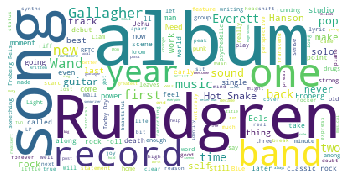

In [54]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [55]:
def rev_cloud(words):
    text = ''
    roev = get_records(words)
    for review in roev.text:
        text += review 
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white').generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

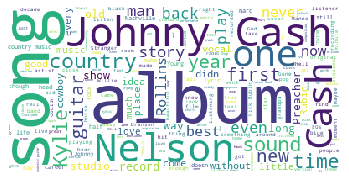

In [56]:
rev_cloud('cowboy')

## Corpus Reader

In [57]:
from nltk.corpus import PlaintextCorpusReader

In [65]:
root = './'
filetype = '.*txt'
corpus = PlaintextCorpusReader(root, filetype)

In [66]:
corpus.fileids()[:5]

['alice.txt']

In [67]:
corpus.raw()[200:500]

" away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: Alice's Adventures in Wonderland\r\n       Illustrated by Arthur Rackham. With a Proem by Austin Dobson\r\n\r\nAuthor: Lewis Carroll\r\n\r\nIllustrator: Arthur Rackham\r\n\r\nR"

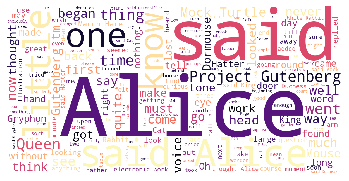

In [68]:
text = ''
for word in corpus.raw():
    text += word
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', colormap = 'magma', height = 600, width = 1200).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [69]:
len(get_records('pop'))

5

In [70]:
text = get_records('pop')
col_num = 2
row_num = 3
text

,album,artists,text,sentiment
580,Say Less,Roy Wood$,OVO Sound signee Roy Wood$ offers a chilled-ou...,0.271008
475,The Space Between,Majid Jordan,The refined sophomore album from Majid Jordan—...,0.268265
7,Universal Love: Wedding Songs Reimagined EP,,"Featuring Bob Dylan, St. Vincent, and Ben Gibb...",0.248650
260,Phantom Thread Original Motion Picture Soundtrack,Jonny Greenwood,"Recorded with a 60-piece orchestra, the Radioh...",0.246984
586,Kick,INXS,Best new reissueThe 30th-anniversary edition o...,0.242337


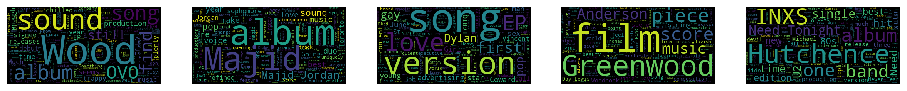

In [71]:
fig, axes = plt.subplots(1,5, figsize = (16, 12))
count = 1
for rev in text['text']:
    plt.subplot(1, 5, count)
    cloud = wordcloud = WordCloud().generate(rev)
    plt.imshow(cloud)
    plt.axis('off')
    count += 1

## Valence Sentiment



In [75]:
# !pip install vaderSentiment

In [76]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize

In [77]:
headers = ['pos', 'neg', 'neu', 'compound']
texts = songs.text
analyzer = SentimentIntensityAnalyzer()
for i in range(len(texts[:20])):
    sentences = sent_tokenize(texts[i])
    pos = compound = neu = neg = 0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos += vs['pos']/(len(sentences))
        compound += vs['compound']/(len(sentences))
        neu += vs['neu']/(len(sentences))
        neg += vs['neg']/len(sentences)
    print(songs.iloc[i]['artists'], pos, neg, neu, compound)
    

Smoke DZA 0.09841666666666667 0.02245833333333333 0.8790833333333333 0.2827708333333333
Makeness 0.07637499999999998 0.0538125 0.86975 0.17410625
Ricky Eat Acid 0.10129166666666667 0.030125 0.868625 0.260825
Entourage 0.09840625 0.0255625 0.8760312499999999 0.283175
The Weeknd 0.10673684210526316 0.05499999999999999 0.8382105263157893 0.2008578947368421
The Messthetics 0.07971428571428571 0.039642857142857146 0.8806428571428572 0.19982142857142857
No JoySonic Boom 0.0784736842105263 0.03757894736842105 0.8839999999999999 0.20490000000000003
 0.15425 0.03029166666666667 0.8154166666666667 0.40077083333333335
Françoise Hardy 0.17800000000000005 0.0296875 0.7923125 0.48922499999999997
Flatbush Zombies 0.08713333333333334 0.0577 0.8550666666666668 0.15604666666666667
A Place to Bury Strangers 0.11235294117647059 0.038470588235294124 0.8491764705882354 0.2838176470588235
Tinashe 0.07552941176470589 0.03111764705882353 0.8932941176470587 0.1978588235294117
Park Jiha 0.10695652173913044 0.054

In [78]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    from nltk import sent_tokenize
    headers = ['pos', 'neg', 'neu', 'compound']
    analyzer = SentimentIntensityAnalyzer()
    print('Album\t\t\t\t\t', 'pos\t', 'neg\t', 'neu\t', 'compound')
    print('-----------------------------------------------------------------------')
    for i in range(len(texts[:5])):
        sentences = sent_tokenize(texts[i])
        pos = compound = neu = neg = 0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos += vs['pos']/(len(sentences))
            compound += vs['compound']/(len(sentences))
            neu += vs['neu']/(len(sentences))
            neg += vs['neg']/len(sentences)
        print('%-20s\t\t\t'%songs.iloc[i]['artists'], '%1.2f\t'%pos, '%1.2f\t'%neg, '%1.2f\t'%neu, '%1.2f\t'%compound)


In [79]:
vader_comparison(songs.text)

Album					 pos	 neg	 neu	 compound
-----------------------------------------------------------------------
Smoke DZA           			 0.10	 0.02	 0.88	 0.28	
Makeness            			 0.08	 0.05	 0.87	 0.17	
Ricky Eat Acid      			 0.10	 0.03	 0.87	 0.26	
Entourage           			 0.10	 0.03	 0.88	 0.28	
The Weeknd          			 0.11	 0.05	 0.84	 0.20	


## Complexity Analysis

In [81]:
root = './'
filetype = '.*txt'
corpus = PlaintextCorpusReader(root, filetype)

In [82]:
len(corpus.words())

39164

In [83]:
len(set(corpus.words()))

3866

In [84]:
lex_diversity = len(set(corpus.words()))/len(corpus.words())

In [85]:
lex_diversity

0.09871310387090185

## Named Entity Analysis

[SpaCy Usage](https://spacy.io/usage/linguistic-features#entity-types)

In [86]:
en = {}
try:
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(corpus.raw())
    for sentence in sentences:
        tokenized = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(tokenized)
        chunked = nltk.ne_chunk(tagged)
        for tree in chunked:
            if hasattr(tree, 'label'):
                ne = ' '.join(c[0] for c in tree.leaves())
                en[ne] = [tree.label(), ''.join(c[1] for c in tree.leaves())]
except Exception as e:
    print(str(e))

In [87]:
import pprint
pp = pprint.PrettyPrinter(indent = 4)
len(en)

301

In [88]:
list(en)[:100]

['Gutenberg',
 'Wonderland',
 'Lewis Carroll',
 'Project Gutenberg License',
 'Arthur Rackham',
 'Austin Dobson Author',
 'Lewis Carroll Illustrator',
 'Arthur Rackham Release Date',
 'English',
 'THIS',
 'ADVENTURES',
 'Jana Srna',
 'Emmy',
 'Online Distributed',
 'University',
 'Florida',
 'Digital Collections',
 'AUSTIN',
 'DOBSON',
 'CARROLL',
 'Sent',
 'Can',
 'TENNIEL',
 'Truth',
 'LEAR',
 'HAMLET',
 'Types',
 'Taste',
 'RIP',
 '_AUSTIN',
 'Ah',
 'Beneath',
 'Imperious',
 'Prima',
 'Secunda',
 'Tertia',
 'Anon',
 'Alice',
 'Childhood',
 'Memory',
 'Pluck',
 'CONTENTS',
 'POOL OF',
 'LONG',
 'RABBIT',
 'LITTLE',
 'PIG',
 'AND',
 'MAD',
 'QUEEN',
 'MOCK',
 'TURTLE',
 'LOBSTER',
 'THE TARTS',
 'EVIDENCE',
 'LIST OF',
 'THE',
 'PLATES _To',
 'Pool',
 'Mary Ann',
 'Queen',
 'Knave',
 'Mock Turtle',
 'White Rabbit',
 'Rabbit',
 'ORANGE',
 'Which',
 'Down',
 'Latitude',
 'Longitude',
 'Please',
 'Australia',
 'Dinah',
 'DRINK',
 'Tears_',
 'CURIOUSER',
 'Right Foot',
 'Esq',
 'Hearthrug

In [89]:
text = nlp(songs.text[4])

In [90]:
displacy.render(text, style = 'ent', jupyter = True)

## Next

In [92]:
df = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip" ,compression='zip')

In [93]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [94]:
df.primaryCategories.unique()

array(['Health & Beauty', 'Electronics', 'Office Supplies',
       'Animals & Pet Supplies', 'Home & Garden', 'Electronics,Furniture',
       'Toys & Games,Electronics', 'Electronics,Media',
       'Office Supplies,Electronics'], dtype=object)

In [95]:
df.nlargest(10, 'reviews.numHelpful')[['reviews.username', 'reviews.text']]

,reviews.username,reviews.text
12859,jetgrrrl,Is Amazon kidding me They want me to pay 19.99...
25880,debugy2k,It's a bit smaller than Apple's wireless keybo...
12764,Heather A,It was just a few weeks ago that I was bemoani...
25878,Rob Blackwell,"Like a lot of reviewers here, I struggled to f..."
25868,Amazon Customer,Stay away from the certified refurbished Amazo...
25884,WingNut/Pilot,Since the details for the items are a little s...
12210,Just Wondering,"I do a lot of international travelling, so I h..."
12862,Jeff L Howley,"No reason. This product is described as 5W, 1 ..."
19689,AlphaKryptonyte,"Now, I didn't expect this to be an amazing tab..."
19290,AlphaKryptonyte,"Now, I didn't expect this to be an amazing tab..."


## Topic Models

In [98]:
from gensim import corpora 
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [101]:
root = './'
filetype = 'alice.txt'
corpus = PlaintextCorpusReader(root, filetype)

In [102]:
corpus.sents()

[['Project', 'Gutenberg', "'", 's', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', ',', 'by', 'Lewis', 'Carroll'], ['This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.'], ...]

In [103]:
words = corpus.words()

In [104]:
texts = [[word for word in sentence if word not in STOPWORDS and word.isalnum()] for sentence in corpus.sents()]

In [105]:
len(texts)

1974

In [106]:
texts[10:12]

[['Produced',
  'Jana',
  'Srna',
  'Emmy',
  'Online',
  'Distributed',
  'Proofreading',
  'Team',
  'http',
  'www',
  'pgdp',
  'net',
  'This',
  'file',
  'produced',
  'images',
  'generously',
  'available',
  'University',
  'Florida',
  'Digital',
  'Collections'],
 ['ALICE', 'S', 'ADVENTURES', 'IN', 'WONDERLAND']]

In [107]:
#prepare the matrix
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [108]:
lda = LdaModel(corpus, id2word=dictionary, num_topics= 4, passes = 3)

In [109]:
pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(lda.print_topics(num_words = 10))

[   (   0,
        '0.053*"I" + 0.038*"said" + 0.033*"Alice" + 0.022*"t" + 0.016*"s" + '
        '0.008*"King" + 0.008*"know" + 0.007*"m" + 0.007*"like" + '
        '0.007*"little"'),
    (   1,
        '0.023*"said" + 0.014*"Alice" + 0.009*"The" + 0.009*"Project" + '
        '0.009*"Gutenberg" + 0.009*"Turtle" + 0.008*"Mock" + 0.007*"Queen" + '
        '0.006*"little" + 0.006*"Caterpillar"'),
    (   2,
        '0.031*"I" + 0.015*"Alice" + 0.010*"The" + 0.008*"little" + '
        '0.007*"thing" + 0.006*"said" + 0.006*"went" + 0.005*"round" + '
        '0.005*"came" + 0.005*"Why"'),
    (   3,
        '0.021*"said" + 0.017*"Alice" + 0.017*"s" + 0.011*"t" + 0.011*"I" + '
        '0.008*"1" + 0.008*"little" + 0.007*"What" + 0.007*"thought" + '
        '0.006*"And"')]


In [110]:
lda = LdaModel(corpus, id2word=dictionary, num_topics= 50, passes = 3)

In [111]:
pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(lda.print_topics(num_words = 10))

[   (   28,
        '0.120*"I" + 0.038*"Alice" + 0.034*"t" + 0.023*"know" + 0.020*"said" + '
        '0.019*"thing" + 0.013*"think" + 0.010*"went" + 0.009*"s" + '
        '0.008*"replied"'),
    (   16,
        '0.135*"I" + 0.045*"t" + 0.040*"said" + 0.036*"m" + 0.016*"Alice" + '
        '0.014*"s" + 0.012*"ll" + 0.009*"That" + 0.008*"know" + 0.008*"door"'),
    (   20,
        '0.026*"Who" + 0.020*"business" + 0.015*"panting" + 0.015*"asking" + '
        '0.015*"But" + 0.015*"round" + 0.015*"won" + 0.015*"crowded" + '
        '0.014*"Did" + 0.013*"What"'),
    (   39,
        '0.035*"I" + 0.019*"voice" + 0.016*"said" + 0.015*"work" + 0.014*"m" + '
        '0.012*"came" + 0.012*"little" + 0.011*"grow" + 0.010*"time" + '
        '0.010*"She"'),
    (   6,
        '0.068*"Illustration" + 0.031*"1" + 0.031*"said" + 0.014*"F" + '
        '0.013*"Alice" + 0.011*"t" + 0.011*"Mary" + 0.011*"Ann" + 0.010*"E" + '
        '0.010*"Two"'),
    (   18,
        '0.028*"Not" + 0.022*"replied" + 0.020

In [112]:
from gensim.test.utils import datapath
temp_file = datapath("model")
lda.save(temp_file)

In [113]:
# Load a potentially pretrained model from disk.
lda = LdaModel.load(temp_file)

## Predictive Modeling with Text

In [114]:
df = pd.read_csv('yelp.csv')

In [115]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [116]:
df.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [117]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [118]:
cvect = CountVectorizer()

In [119]:
cvect.fit_transform(df.text)

<10000x29185 sparse matrix of type '<class 'numpy.int64'>'
	with 827105 stored elements in Compressed Sparse Row format>

In [120]:
cvect.get_feature_names()[:10]

['00', '000', '007', '00a', '00am', '00pm', '01', '02', '03', '03342']

In [121]:
words = cvect.fit_transform(df.text)

In [122]:
words

<10000x29185 sparse matrix of type '<class 'numpy.int64'>'
	with 827105 stored elements in Compressed Sparse Row format>

In [123]:
words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [125]:
pipe = make_pipeline(CountVectorizer(max_features=300), LinearRegression())

In [126]:
X = df.text
y = df.stars

In [127]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=300, min_df=1, ngram_range=(1, 1),
                                 preprocessor=None, stop_words=None,
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [128]:
pipe.score(X, y)

0.34945910601677954

## Summarizer

In [129]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from heapq import nlargest
from collections import defaultdict

class FrequencySummarizer:
    
    def __init__(self, min_cut = 0.1, max_cut = 0.9):
        self._min_cut = min_cut
        self._max_cut = max_cut
        self._stopwords = set(stopwords)
        
    def compute_frequencies(self, word_sent):
        freq = defaultdict(int)
        
        for sentence in word_sent:
            
            for word in sentence:
                if word not in self._stopwords:
                    freq[word] += 1
                        
        max_freq = float(max(freq.values()))               
    
        for word in freq.keys():

            freq[word] = freq[word]/max_freq
            
        if freq[word] >= self._max_cut or freq[word] <= self._min_cut:
            del freq[word]
        return freq

    def summarize(self, text, n):
        sents = sent_tokenize(text)
        
        assert n <= len(sents)
        word_sent = [word_tokenize(s.lower()) for s in sents]
        self._freq = self.compute_frequencies(word_sent)
        
        rankings = defaultdict(int)
        
        for i, sent in enumerate(word_sent):
            for word in sent:
                if word in self._freq:
                    rankings[i] += self._freq[word]
                    
        sents_idx = nlargest(n, rankings, key = rankings.get)
        return [sents[j] for j in sents_idx]
                    

In [130]:
s = '''
Sgt. Pepper's Lonely Hearts Club Band, The Beatles (1967) Voted the worst record ever made in a 1998 Melody Maker poll of pop stars, DJs, and journalists.[3] Among the harshest detractors was musician and journalist John Robb, who described the album as "the benchmark of 1967 - the low water point of rock 'n' roll".[3] Guardian critic Richard Smith wrote that it is, "if not the worst, then certainly the most overrated album of all time." He also contended that the "excruciating" LP was often ranked by members of the music press as the best ever due to affection for its cultural impact, and "not because of anything intrinsically great about the record".[4] Billy Childish was asked in 2007 to nominate the "supposedly great" album that he would "gladly never hear again", and he named Sgt. Pepper's Lonely Hearts Club Band and argued that it "signalled the death of rock 'n' roll".[5] Musician and author Bill Drummond called the record "the worst thing that ever happened to music
'''

In [131]:
f = FrequencySummarizer()

In [132]:
f.compute_frequencies(s)

defaultdict(int,
            {'\n': 0.011976047904191617,
             'S': 0.017964071856287425,
             'g': 0.0718562874251497,
             '.': 0.041916167664670656,
             ' ': 1.0,
             'P': 0.017964071856287425,
             'e': 0.49101796407185627,
             'p': 0.08383233532934131,
             'r': 0.30538922155688625,
             "'": 0.03592814371257485,
             'L': 0.017964071856287425,
             'n': 0.2754491017964072,
             'l': 0.23353293413173654,
             'H': 0.017964071856287425,
             'C': 0.017964071856287425,
             'u': 0.1377245508982036,
             'b': 0.08383233532934131,
             'B': 0.029940119760479042,
             ',': 0.04790419161676647,
             'T': 0.005988023952095809,
             'h': 0.23353293413173654,
             '(': 0.005988023952095809,
             '1': 0.017964071856287425,
             '9': 0.023952095808383235,
             '6': 0.011976047904191617,
             

In [133]:
f.summarize(s, 4)

['[3] Among the harshest detractors was musician and journalist John Robb, who described the album as "the benchmark of 1967 - the low water point of rock \'n\' roll".',
 '[4] Billy Childish was asked in 2007 to nominate the "supposedly great" album that he would "gladly never hear again", and he named Sgt.',
 'He also contended that the "excruciating" LP was often ranked by members of the music press as the best ever due to affection for its cultural impact, and "not because of anything intrinsically great about the record".',
 "Pepper's Lonely Hearts Club Band, The Beatles (1967) Voted the worst record ever made in a 1998 Melody Maker poll of pop stars, DJs, and journalists."]